<a href="https://colab.research.google.com/github/syahla31/PCVK_Ganjil_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Laporan Praktikum Pertemuan 11 - Pengolahan Citra dan Visi Komputer**
---
Nama: Syahla' Syafiqah Fayra

NIM: 2141720015

### TUGAS PRAKTIKUM
---

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama“Week11.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
cara sebagai berikut.


In [1]:
#import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

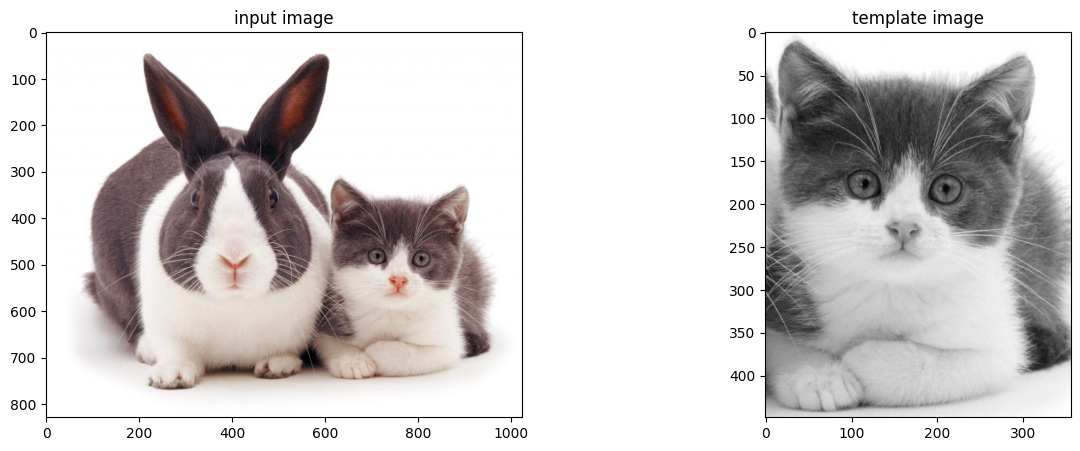

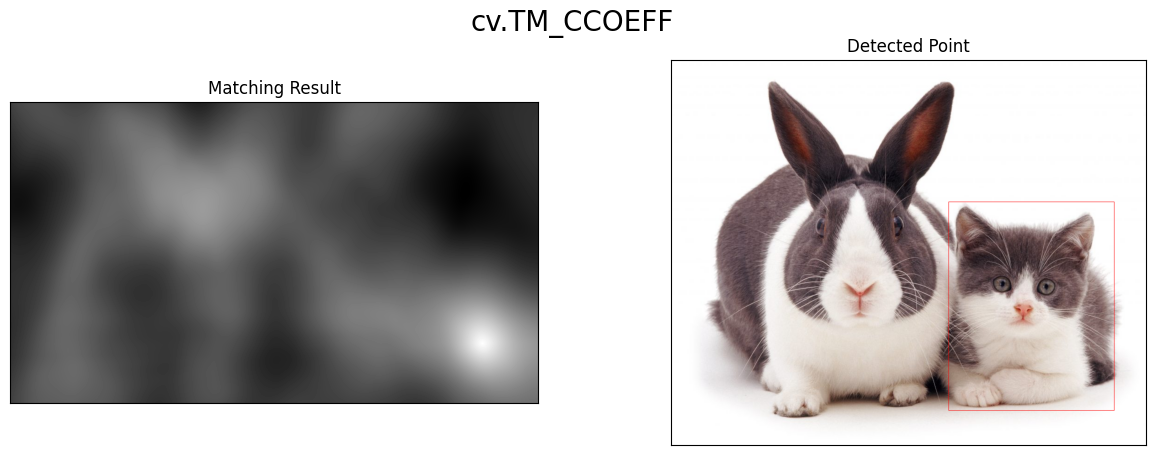

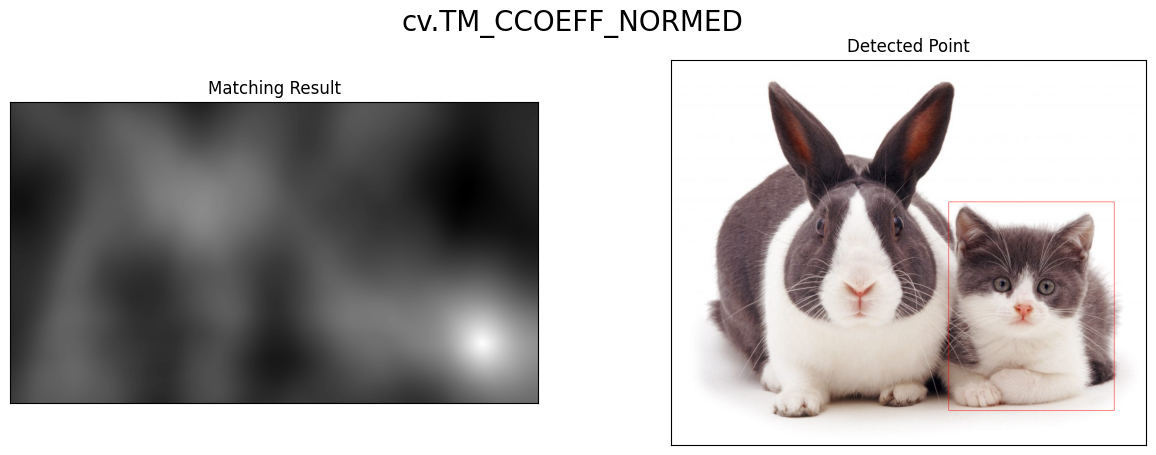

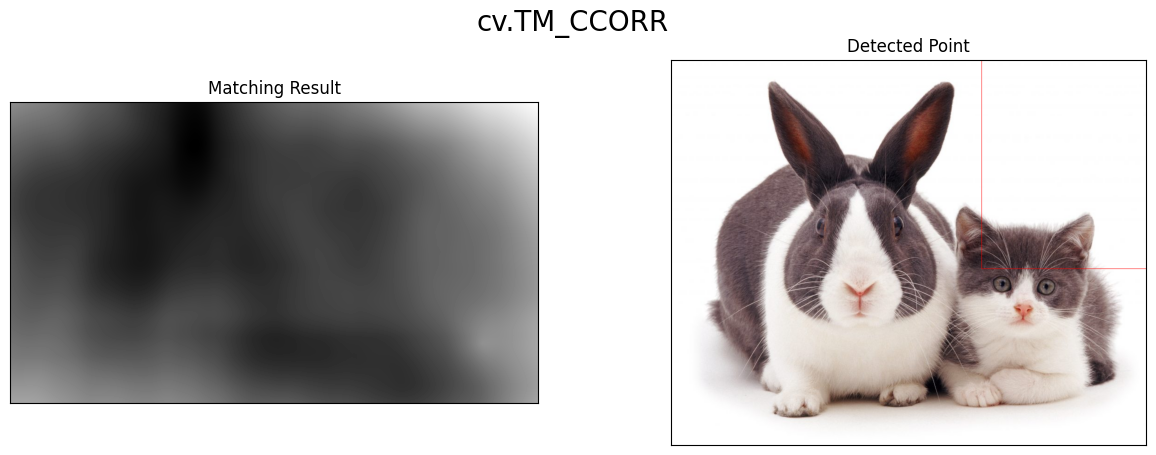

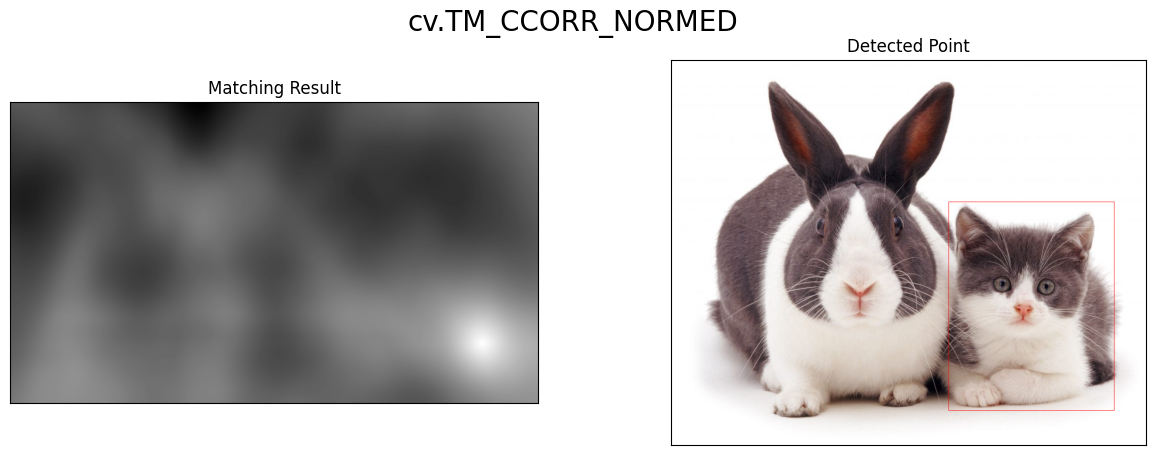

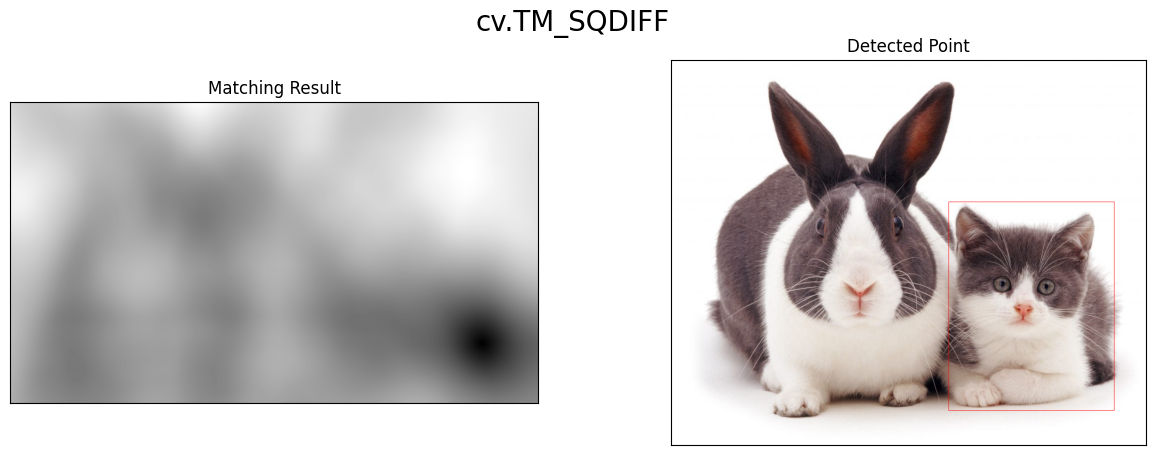

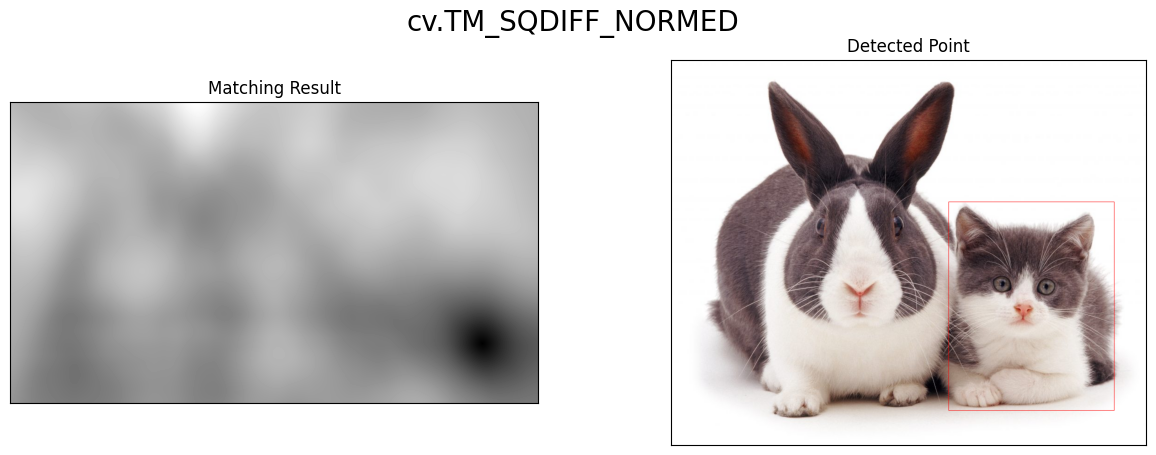

In [ ]:
# load citra input
img = cv.imread('/content/drive/MyDrive/Images/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/Images/Object Detection/cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut:


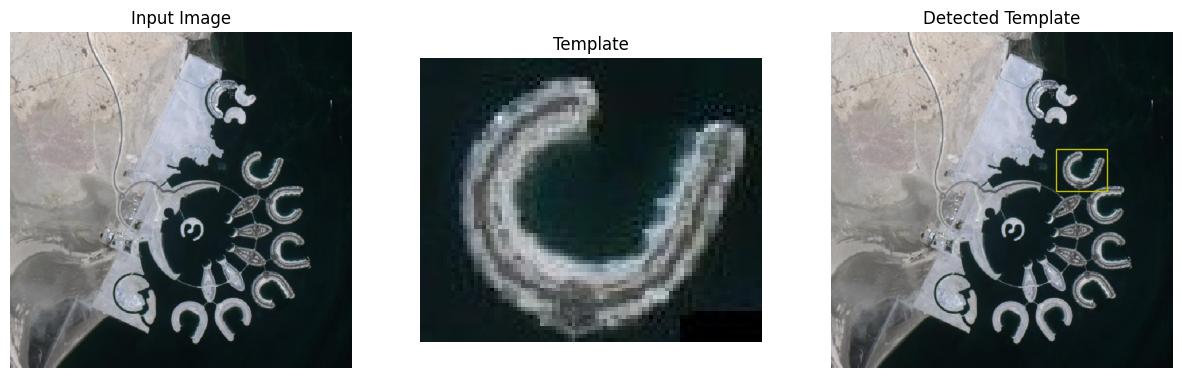

In [2]:
from PIL import Image

def normalize(arr):
    return (arr - arr.mean()) / (arr.std() * len(arr))

# Load images
img = Image.open('/content/drive/MyDrive/Images/Object Detection/bahrain.jpg')
template = Image.open('/content/drive/MyDrive/Images/Object Detection/bahrain-template.jpg')

# Convert images to grayscale
img_gray = img.convert('L')
template_gray = template.convert('L')

# Convert images to NumPy arrays
img_array = np.array(img_gray)
template_array = np.array(template_gray)

# Normalize the arrays
img_norm = normalize(img_array)
template_norm = normalize(template_array)

# Perform cross-correlation
correlation = np.zeros((img_array.shape[0] - template_array.shape[0], img_array.shape[1] - template_array.shape[1]))

for y in range(correlation.shape[0]):
    for x in range(correlation.shape[1]):
        roi = img_norm[y:y + template_array.shape[0], x:x + template_array.shape[1]]
        correlation[y, x] = np.sum(roi * template_norm)

# Find the location of the maximum correlation
y, x = np.unravel_index(np.argmax(correlation), correlation.shape)

# Display the result
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img)
ax[0].set_title('Input Image')
ax[0].axis('off')

ax[1].imshow(template)
ax[1].set_title('Template')
ax[1].axis('off')

ax[2].imshow(img)
rect = plt.Rectangle((x, y), template_array.shape[1], template_array.shape[0], edgecolor='y', facecolor='none')
ax[2].add_patch(rect)
ax[2].set_title('Detected Template')
ax[2].axis('off')

plt.show()

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut:

In [ ]:
img= cv.imread('/content/drive/MyDrive/Images/Object Detection/car-park.jpg')

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img_car = cv.cvtColor(img, cv.COLOR_BGR2RGB)

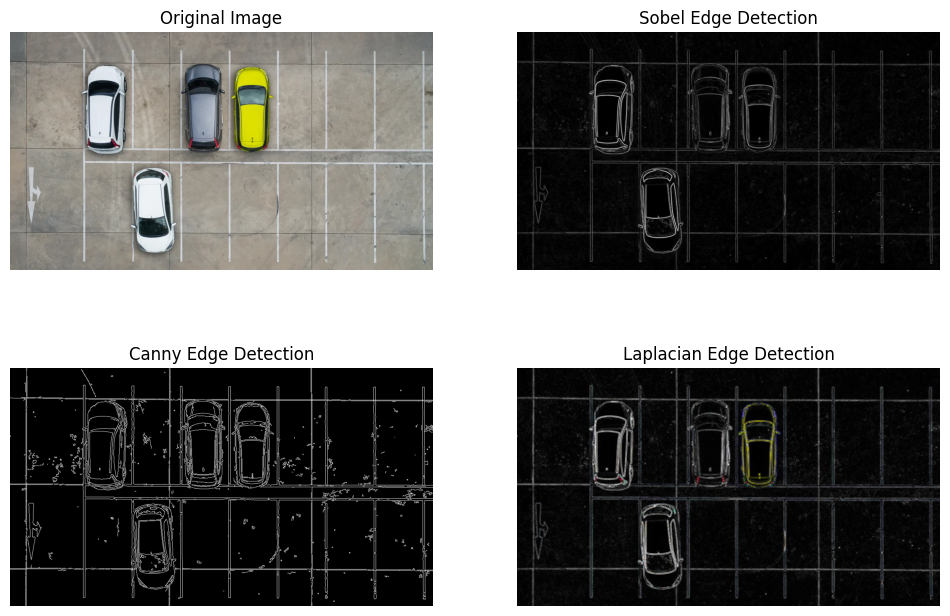

<Figure size 640x480 with 0 Axes>

In [ ]:
from cv2.gapi import Laplacian
# Baca gambar
image = cv2.imread('/content/drive/MyDrive/Images/Object Detection/car-park.jpg')

# Konversi ke citra keabuan
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Sobel Edge Detection
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Canny Edge Detection
canny = cv2.Canny(gray_image, 50, 150)

# Laplacian Edge Detection
img_car_noise = cv.GaussianBlur(image, (3, 3), 0)
filtered_image = cv.Laplacian(img_car_noise, cv.CV_16S, ksize=3)
filtered_image = cv.convertScaleAbs(filtered_image)

# Tampilkan hasil
plt.figure(figsize=(12, 8))

plt.subplot(221), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(222), plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(223), plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.subplot(224), plt.imshow(cv.cvtColor(filtered_image, cv.COLOR_BGR2RGB))
plt.title('Laplacian Edge Detection')
plt.axis('off')
plt.show()

plt.tight_layout()
plt.show()

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:

* **Harris Corner Detection**

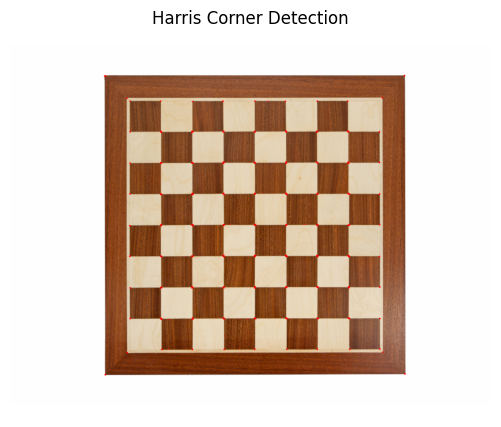

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#load citra input
input_img = cv.imread('/content/drive/MyDrive/Images/Object Detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai
input_img[dst>0.01*dst.max()]=[0,0,255]

# Tampilkan hasil Harris Corner Detection
plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

* **Shi-Tomasi Detection**

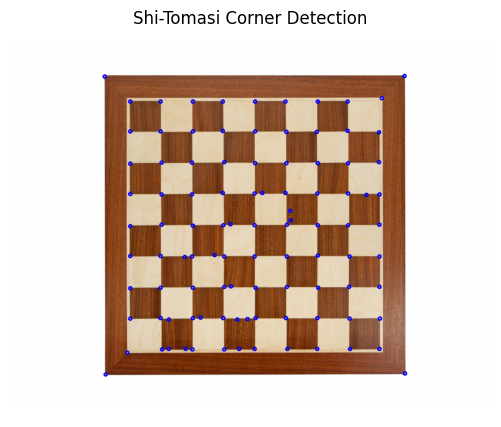

In [6]:
input_img = cv.imread('/content/drive/MyDrive/Images/Object Detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10)
corners = np. int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(input_img, (x,y),3,255,2)

# Tampilkan hasil Shi-Tomasi Corner Detection
plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')
plt.show()

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut:


number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


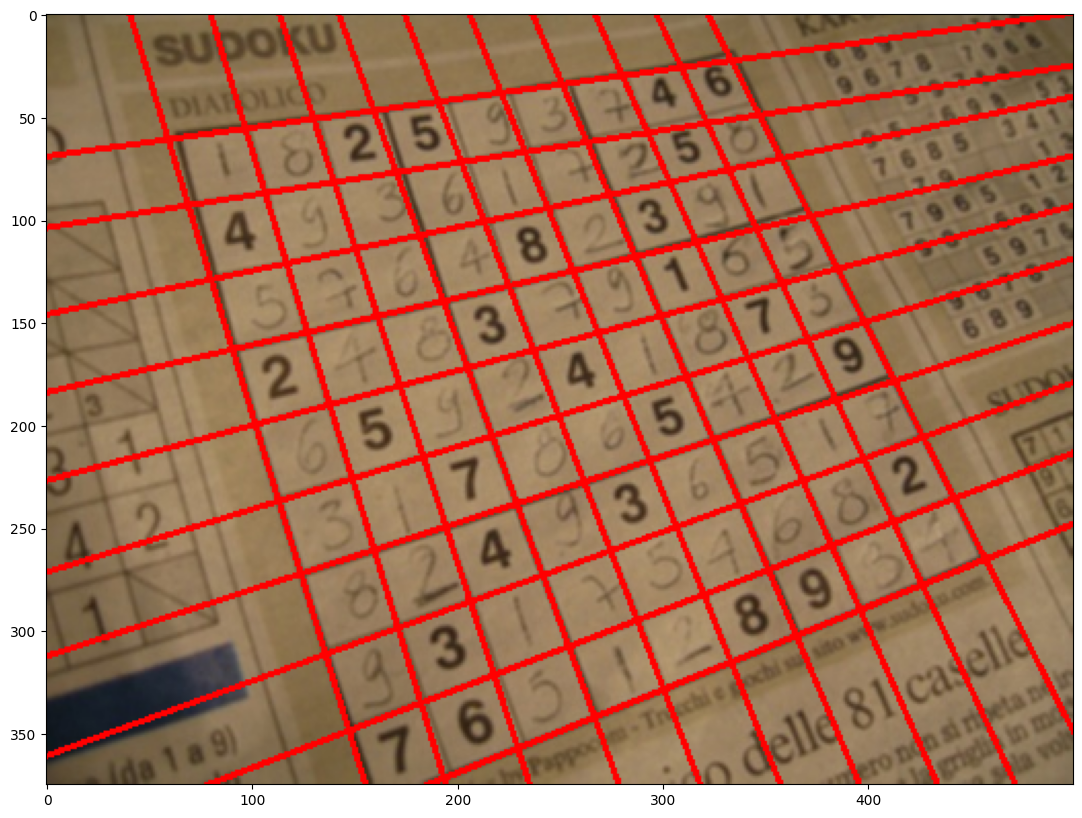

In [ ]:
input_img = cv.imread('/content/drive/MyDrive/Images/Object Detection/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

7. Implementasikan fungsi findContours() padaOpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:


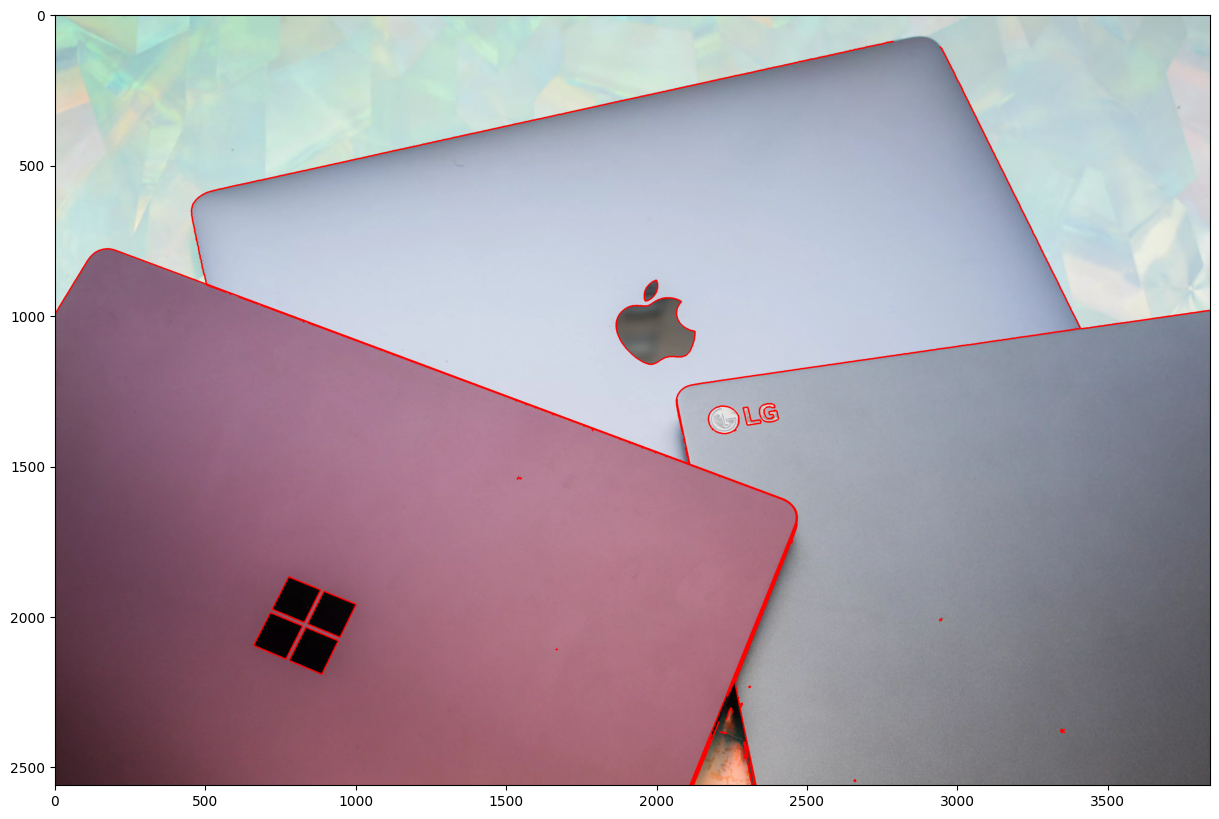

In [ ]:
img = cv.imread('/content/drive/MyDrive/Images/Object Detection/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

### Pengayaan Materi KTP
---

1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

2. Muat 2 library berikut sebagai tahapan persiapan


In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow

3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori
dataset tersebut

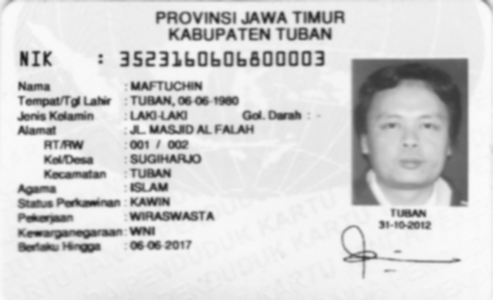

In [ ]:
# Lokasi hasil pelat
src = cv.imread("/content/drive/MyDrive/Images/KTP_More/ktp3.png")
blurred = src.copy()
# Konversi gambar ke citra keabuan
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Terapkan Gaussian Blur untuk mengurangi noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Tambahkan kode di sini untuk pemrosesan tambahan (jika diperlukan)
# Tampilkan hasil dari setiap gambar yang telah diproses
cv2_imshow(blurred)

4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi


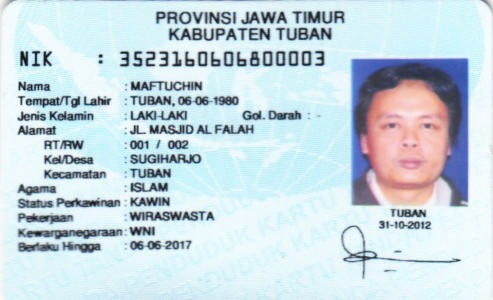

In [ ]:
# Lokasi hasil pelat
src = cv.imread("/content/drive/MyDrive/Images/KTP_More/ktp3.png")
blurred = src.copy()

# Terapkan Gaussian Blur untuk mengurangi noise
blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

# Tambahkan kode di sini untuk pemrosesan tambahan (jika diperlukan)
# Tampilkan hasil dari setiap gambar yang telah diproses
cv2_imshow(blurred)

5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra


168.0 (300, 493)


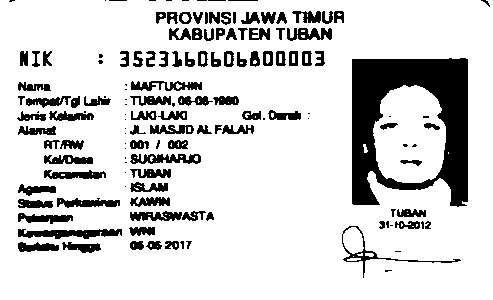

In [ ]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

cv2_imshow(bw)

6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

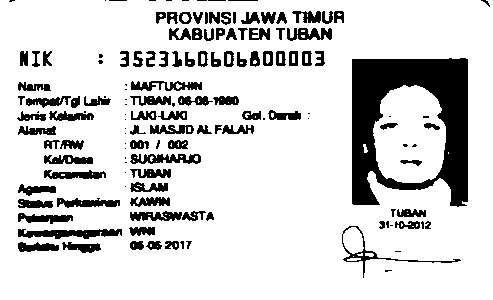

In [ ]:
erode = cv2.erode(bw.copy(),cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

cv2_imshow(erode)

7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek.
Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di
dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu
penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran
dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain
terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik (karena hasil akuisisi setiap citra dapat berbeda).

+ x=217, y=11, w=7, h=4, rasio=1.75


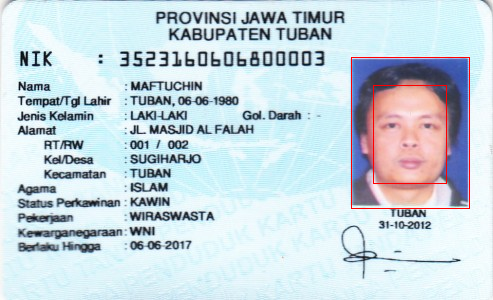

In [ ]:
# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
  x, y, w, h = cv2.boundingRect(cnt)
  ras = format(w / h, '.2f')
  if h >= 40 and w >= 10 and float(ras) <= 1:
    cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

print("+ x={}, y={}, w={}, h={}, rasio={}".format(x,y, w, h, ras))
cv2_imshow(src)

### TUGAS PRAKTIKUM
---

Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP
untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing
yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan
secara berkelompok dengan aturan sebagai berikut:

Kelompok 1 – KTP Riyanto Sleman

Kelompok 2 – KTP Galang Raka Bengkulu

Kelompok 3 – KTP Arief Wijaya Cimahi

Kelompok 4 – KTP Edo Nias

Kelompok 5 – KTP Widiarso Bekasi

Kelompok 6 – KTP Abdurrauf Soppeng

----

> Kelompok 6
>
> 1. Clarita Putri Anggraeni (2141720213)
>
> 2. Muhammad Bintang Sholu Firmansyah (2141720101)
>
> 3. Syahla’ Syafiqah Fayra (2141720015)
>
> 4. Yasmine Navisha Andhani (2141720047)

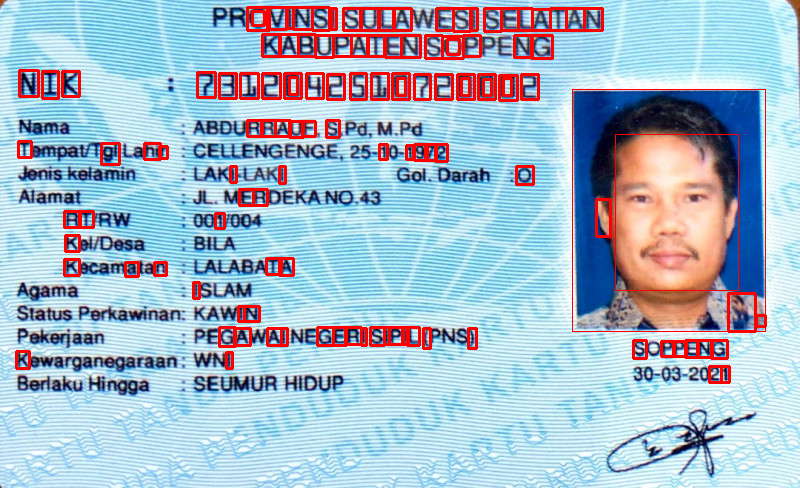

In [8]:
from google.colab.patches import cv2_imshow

ktp = cv.imread("/content/drive/MyDrive/Images/KTP_More/ktp7.png")

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 20 and w >= 5 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

cv2_imshow(ktp)